In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
trade_df = pd.read_csv("historical_data.csv")
sentiment_df = pd.read_csv("fear_greed_index.csv")


In [3]:
trade_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [4]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [5]:
trade_df.shape  ,  sentiment_df.shape

((211224, 16), (2644, 4))

In [6]:
trade_df.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [7]:
sentiment_df.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [8]:
sentiment_df = sentiment_df.rename(columns={
    "date": "SentimentDate",
    "value": "FearGreedValue",
    "timestamp":"SentimentTimestamp"
})


In [9]:
trade_df["Timestamp IST"] = pd.to_datetime(trade_df["Timestamp IST"], format="%d-%m-%Y %H:%M").dt.date
sentiment_df["SentimentDate"] = pd.to_datetime(sentiment_df["SentimentDate"]).dt.date

In [10]:
df = pd.merge(
    trade_df,
    sentiment_df,
    left_on="Timestamp IST",
    right_on="SentimentDate",
    how="left"
)
df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,SentimentTimestamp,FearGreedValue,classification,SentimentDate
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,1.733117e+09,80.0,Extreme Greed,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,1.733117e+09,80.0,Extreme Greed,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,1.733117e+09,80.0,Extreme Greed,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,1.733117e+09,80.0,Extreme Greed,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,1.733117e+09,80.0,Extreme Greed,2024-12-02


In [11]:
df = df.drop(columns=["SentimentDate","SentimentTimestamp","Timestamp"]) 

In [12]:
df.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
FearGreedValue      6
classification      6
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  FearGreedValue    211218 non-null  float64
 16  classification    21

In [14]:
df.dropna(inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
df.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,FearGreedValue
count,211218.000000,2.112180e+05,2.112180e+05,2.112180e+05,211218.000000,2.112180e+05,211218.000000,2.112180e+05,211218.000000
mean,11415.047529,4.623341e+03,5.639192e+03,-2.994671e+04,48.549304,6.965470e+10,1.163960,5.628506e+14,51.649656
std,29448.010305,1.042744e+05,3.657557e+04,6.738170e+05,917.989791,1.835714e+10,6.758948,3.257541e+14,21.012784
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,10.000000
25%,4.858550,2.940000e+00,1.937900e+02,-3.760725e+02,0.000000,5.984223e+10,0.016121,2.810000e+14,33.000000
50%,18.280000,3.200000e+01,5.970200e+02,8.477051e+01,0.000000,7.442939e+10,0.089572,5.620000e+14,49.000000
75%,101.895000,1.878900e+02,2.058878e+03,9.337697e+03,5.790132,8.335543e+10,0.393774,8.460000e+14,72.000000
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,94.000000


In [17]:
print(df['classification'].value_counts())

classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64


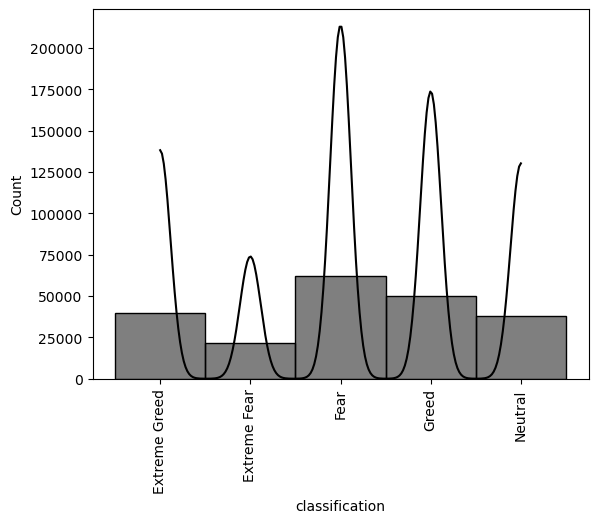

In [18]:
sns.histplot(df["classification"],kde=True,color="k")
plt.xticks(rotation=90)
plt.show()

<Axes: >

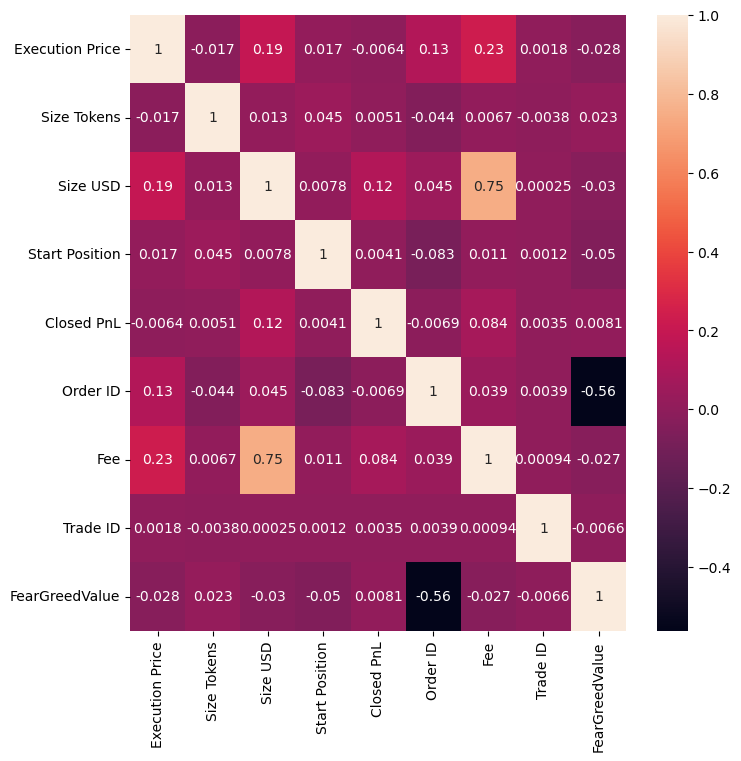

In [19]:
plt.figure(figsize=(8,8))
numericat_dty=df.select_dtypes(include=["int64","float64"])
sns.heatmap(numericat_dty.corr(),annot=True)

In [20]:
by_sentiment = df.groupby('classification')['Closed PnL'].mean()
print(by_sentiment)

classification
Extreme Fear     34.537862
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Neutral          34.307718
Name: Closed PnL, dtype: float64


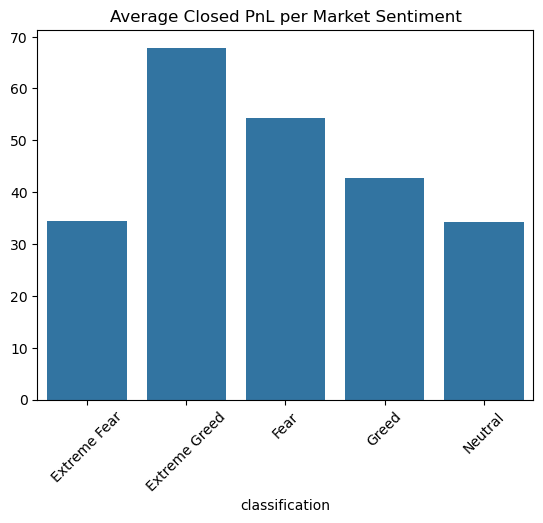

In [21]:
sns.barplot(x=by_sentiment.index, y=by_sentiment.values)
plt.xticks(rotation=45)
plt.title("Average Closed PnL per Market Sentiment")
plt.show()

In [22]:
usdby_sentiment=df.groupby("classification")["Size USD"].mean()
print(usdby_sentiment)

classification
Extreme Fear     5349.731843
Extreme Greed    3112.251565
Fear             7816.109931
Greed            5736.884375
Neutral          4782.732661
Name: Size USD, dtype: float64


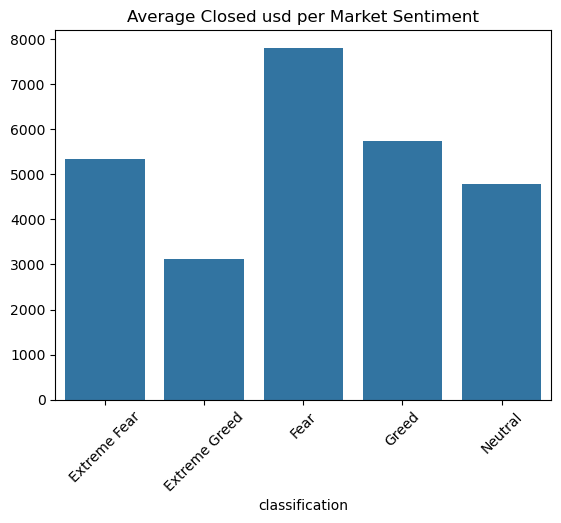

In [23]:
sns.barplot(x=usdby_sentiment.index, y=usdby_sentiment.values)
plt.xticks(rotation=45)
plt.title("Average Closed usd per Market Sentiment")
plt.show()

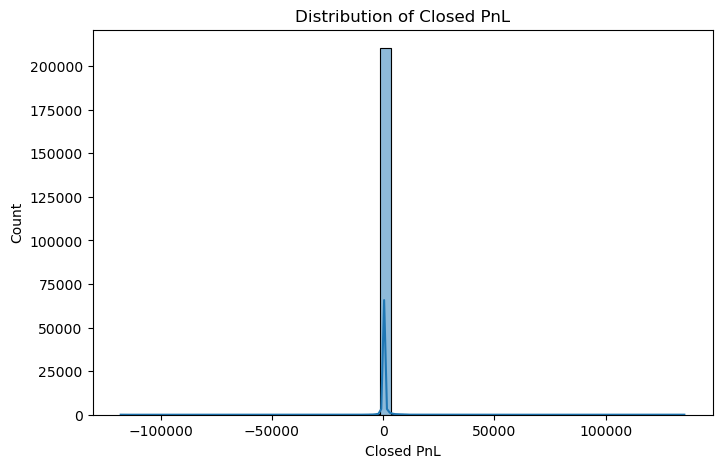

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(df['Closed PnL'], bins=50, kde=True)
plt.title("Distribution of Closed PnL")
plt.show()

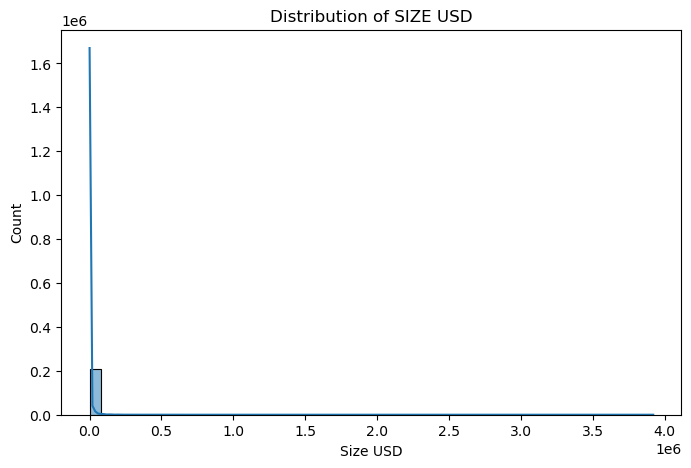

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(df['Size USD'], bins=50, kde=True)
plt.title("Distribution of SIZE USD")
plt.show()

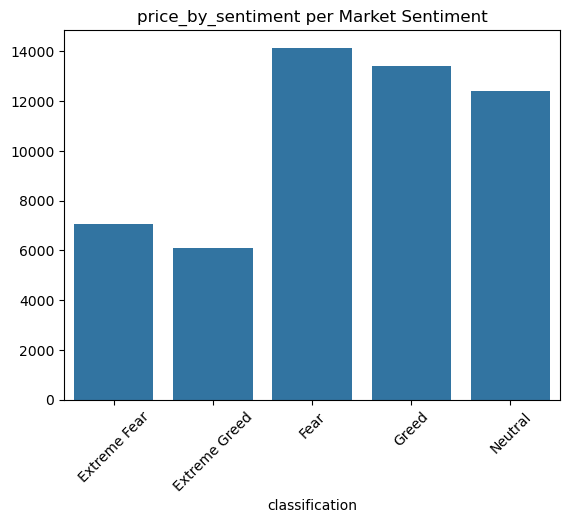

In [26]:
price_by_sentiment = df.groupby('classification')['Execution Price'].mean()
sns.barplot(x=price_by_sentiment.index, y=price_by_sentiment.values)
plt.xticks(rotation=45)
plt.title("price_by_sentiment per Market Sentiment")
plt.show()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211218 entries, 0 to 211223
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211218 non-null  object 
 1   Coin              211218 non-null  object 
 2   Execution Price   211218 non-null  float64
 3   Size Tokens       211218 non-null  float64
 4   Size USD          211218 non-null  float64
 5   Side              211218 non-null  object 
 6   Timestamp IST     211218 non-null  object 
 7   Start Position    211218 non-null  float64
 8   Direction         211218 non-null  object 
 9   Closed PnL        211218 non-null  float64
 10  Transaction Hash  211218 non-null  object 
 11  Order ID          211218 non-null  int64  
 12  Crossed           211218 non-null  bool   
 13  Fee               211218 non-null  float64
 14  Trade ID          211218 non-null  float64
 15  FearGreedValue    211218 non-null  float64
 16  classification    211218 

C:\Users\Dell\AppData\Local\Temp\ipykernel_1920\3485836729.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, palette="magma")


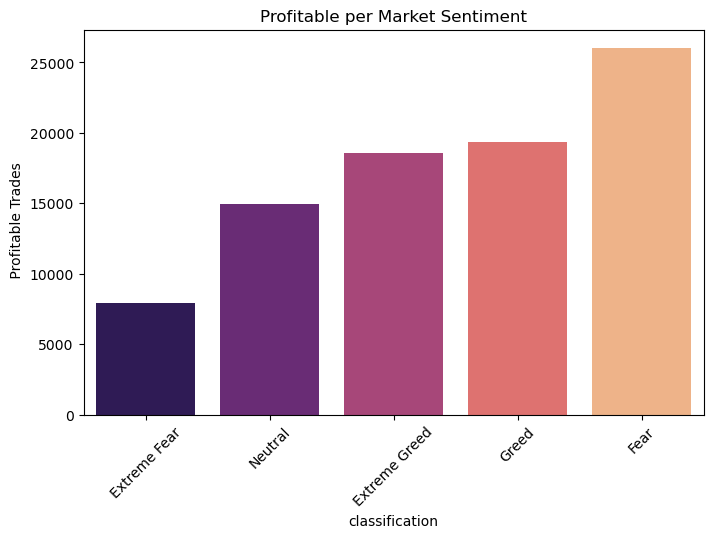

In [28]:
df['Profit'] = df['Closed PnL'] > 0
count = df.groupby('classification')['Profit'].sum().sort_values()
plt.figure(figsize=(8,5))
sns.barplot(x=count.index, y=count.values, palette="magma")
plt.xticks(rotation=45)
plt.ylabel(" Profitable Trades")
plt.title("Profitable per Market Sentiment")
plt.show()

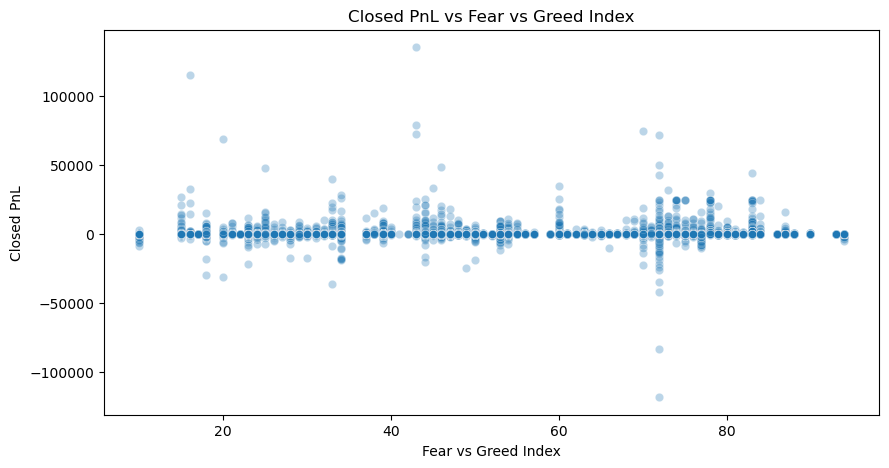

In [29]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='FearGreedValue', y='Closed PnL', data=df, alpha=0.3)
plt.xlabel("Fear vs Greed Index")
plt.ylabel("Closed PnL")
plt.title("Closed PnL vs Fear vs Greed Index")
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_1920\3675461040.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='classification', y='Closed PnL', data=df, palette="Set2")


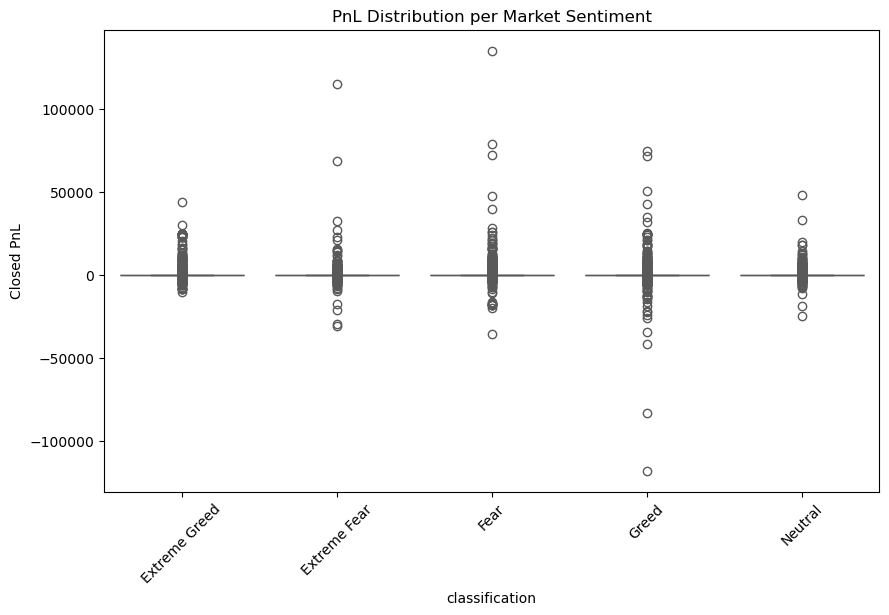

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(x='classification', y='Closed PnL', data=df, palette="Set2")
plt.xticks(rotation=45)
plt.title("PnL Distribution per Market Sentiment")
plt.show()


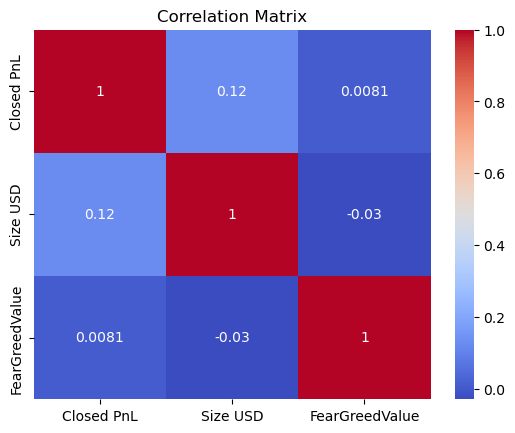

In [31]:
col = ['Closed PnL', 'Size USD', 'FearGreedValue']
corr = df[col].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [32]:
df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,FearGreedValue,classification,Profit
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,80.0,Extreme Greed,False
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,80.0,Extreme Greed,False
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,80.0,Extreme Greed,False
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,80.0,Extreme Greed,False
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,80.0,Extreme Greed,False


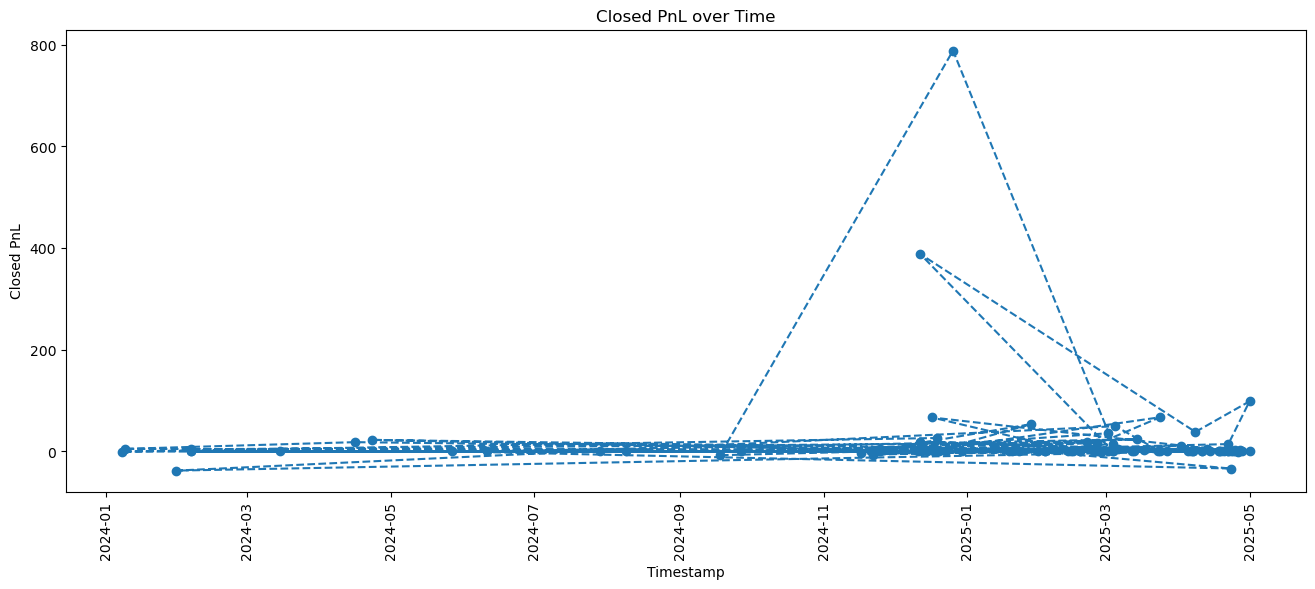

In [33]:
# plt.subplot(3,1,3)
# plt.plot(df['Timestamp IST'], df['Closed PnL'], marker='x', linestyle='-', color='red')
# plt.xlabel('Timestamp')
# plt.ylabel('Closed PnL')
# plt.title('Closed PnL over Time')
# plt.grid(True)

df_sample = df.sample(n=100, random_state=42)  
plt.figure(figsize=(16,6))
plt.plot(df_sample['Timestamp IST'], df_sample['Closed PnL'], marker='o', linestyle='--')
plt.xlabel("Timestamp")
plt.ylabel("Closed PnL")
plt.title("Closed PnL over Time")
plt.xticks(rotation=90)
plt.show()

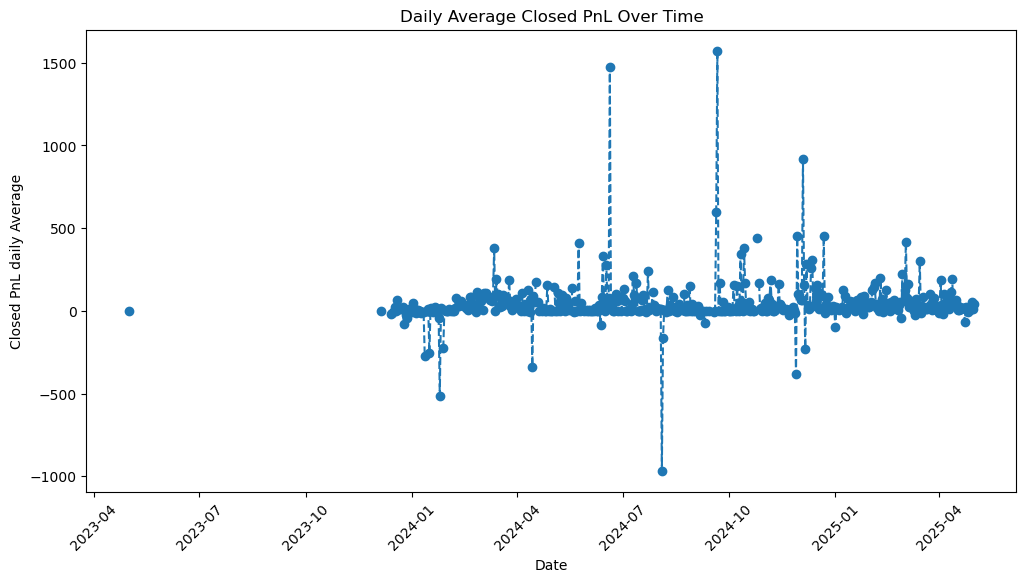

In [34]:
df['Timestamp IST'] = pd.to_datetime(df['Timestamp IST'], format="%d-%m-%Y %H:%M")
df_resampled = df.resample('D', on='Timestamp IST')['Closed PnL'].mean()
plt.figure(figsize=(12,6))
plt.plot(df_resampled.index, df_resampled.values, marker='o', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Closed PnL daily Average")
plt.title("Daily Average Closed PnL Over Time")
plt.xticks(rotation=45)
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_1920\1208443594.py:2: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  weekly_resample=df.resample("w",on="Timestamp IST")["Closed PnL"].mean()


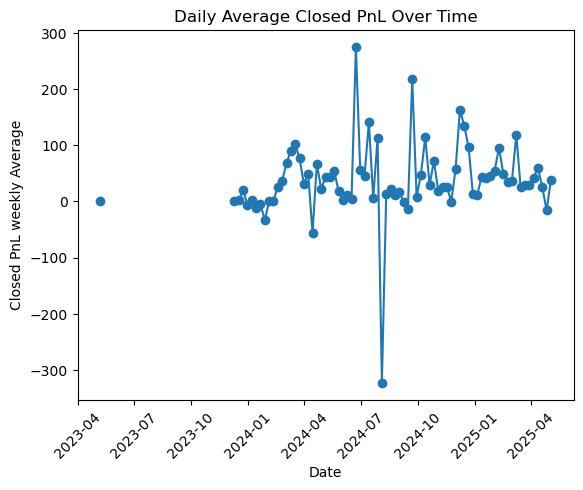

In [35]:
df['Timestamp IST'] = pd.to_datetime(df['Timestamp IST'], format="%d-%m-%Y %H:%M")
weekly_resample=df.resample("w",on="Timestamp IST")["Closed PnL"].mean()
plt.plot(weekly_resample.index, weekly_resample.values ,marker="o",linestyle='-')
plt.xlabel("Date")
plt.ylabel("Closed PnL weekly Average")
plt.title("Daily Average Closed PnL Over Time")
plt.xticks(rotation=45)
plt.show()

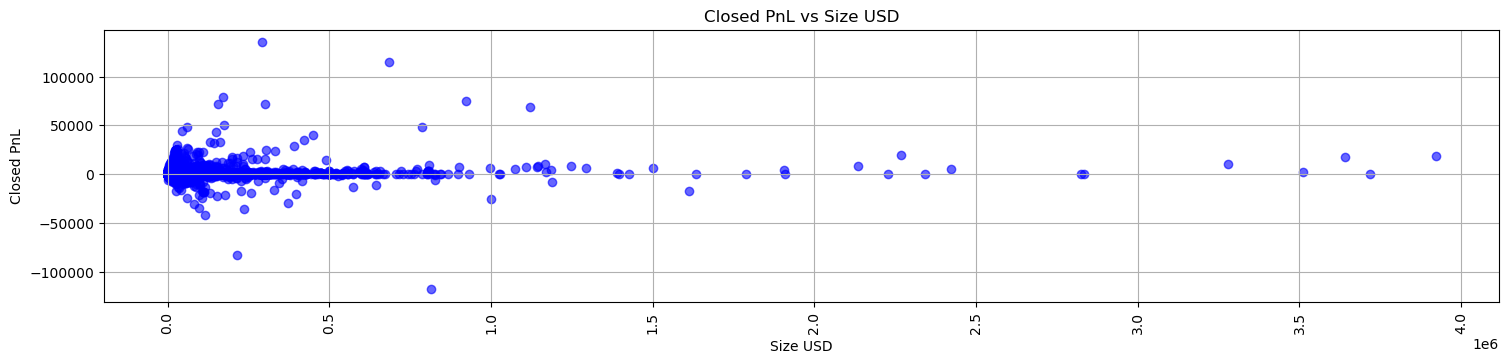

In [36]:
plt.figure(figsize=(18,12))
plt.subplot(3,1,1)
plt.scatter(df['Size USD'], df['Closed PnL'], c='blue', alpha=0.6)
plt.xlabel('Size USD')
plt.ylabel('Closed PnL')
plt.title('Closed PnL vs Size USD')
plt.xticks(rotation=90)
plt.grid(True)

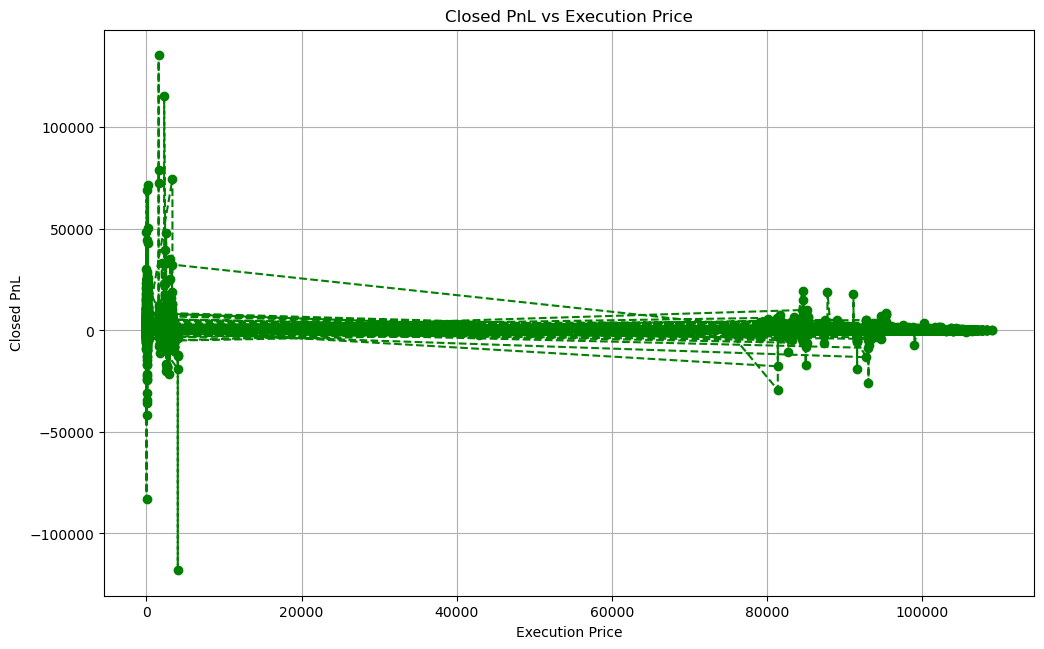

In [37]:
plt.figure(figsize=(12,25))
plt.subplot(3,1,2)
plt.plot(df['Execution Price'], df['Closed PnL'], marker='o', linestyle='--', color='green')
plt.xlabel('Execution Price')
plt.ylabel('Closed PnL')
plt.title('Closed PnL vs Execution Price')
plt.grid(True)

In [38]:
# plt.figure(figsize=(6,6))
# for j in numericat_dty.columns:
#     sns.histplot(df[j],kde=True)
#     plt.xlabel(i)
#     plt.title(f"distribution of {i}")
#     plt.show()

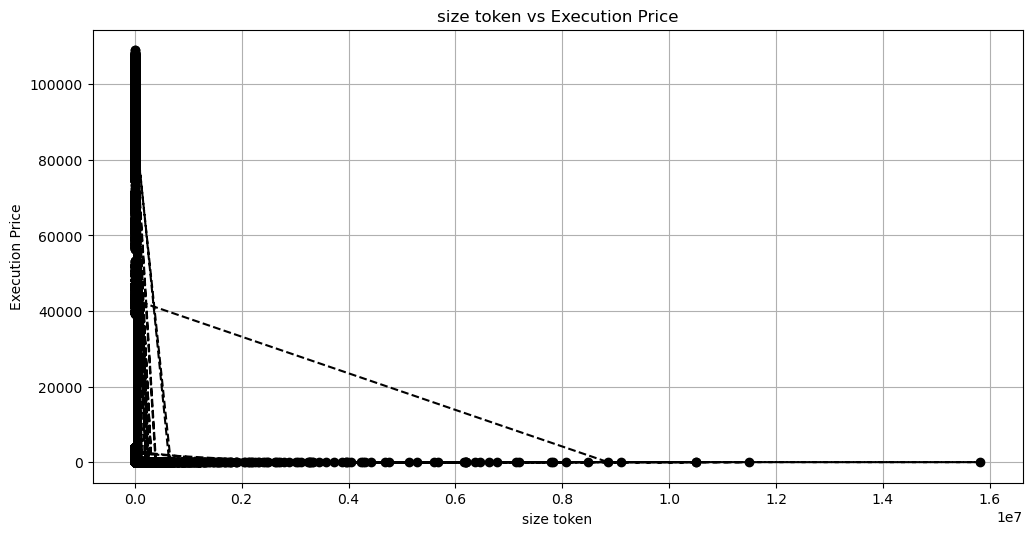

In [39]:
plt.figure(figsize=(12,20))
plt.subplot(3,1,2)
plt.plot( df['Size Tokens'],df['Execution Price'], marker='o', linestyle='--', color='k')
plt.ylabel('Execution Price')
plt.xlabel("size token")
plt.title('size token vs Execution Price')
plt.grid(True)

In [40]:
numericat_dty.skew()

Execution Price     2.299367
Size Tokens        70.139227
Size USD           43.777149
Start Position     -8.684373
Closed PnL         30.786023
Order ID           -1.532608
Fee                35.533797
Trade ID            0.001639
FearGreedValue     -0.008299
dtype: float64

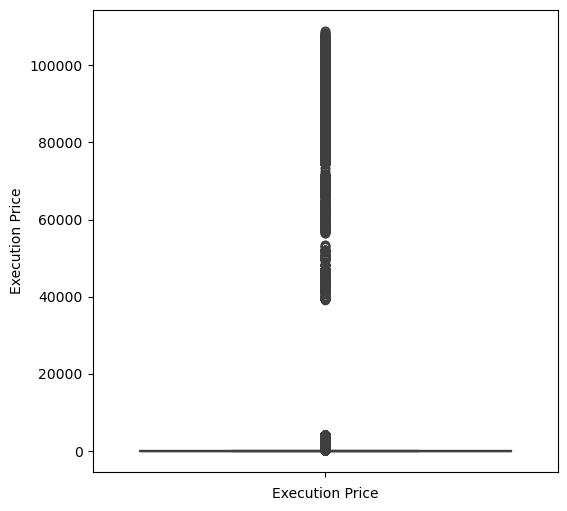

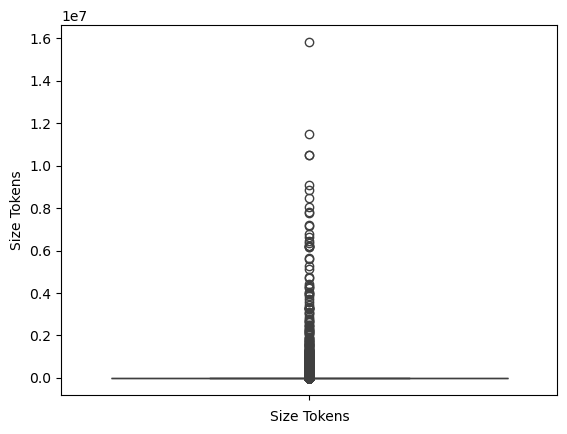

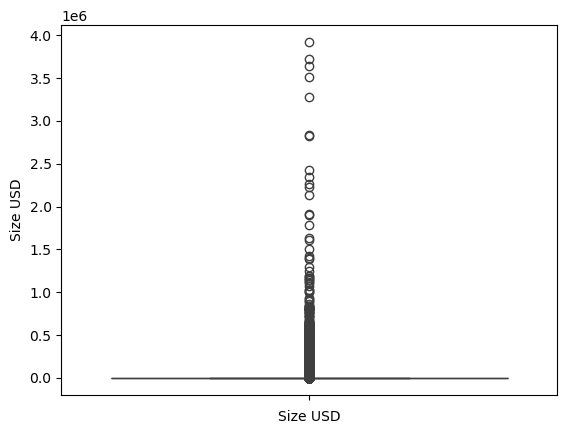

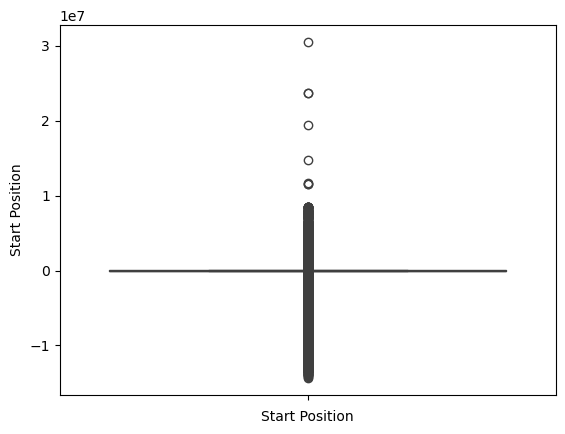

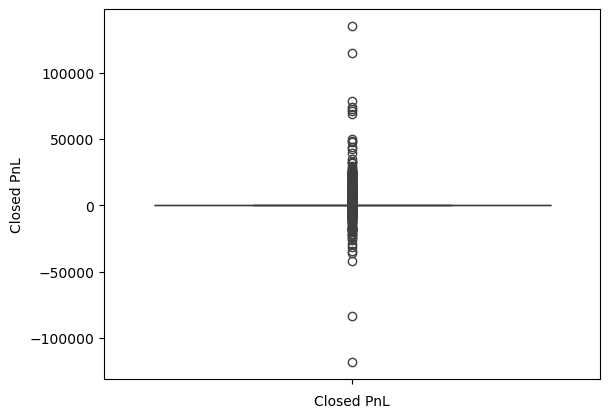

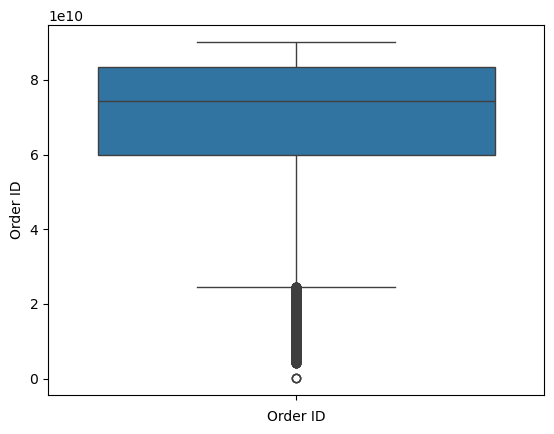

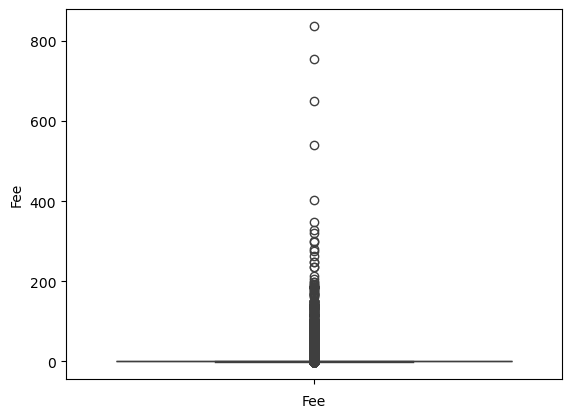

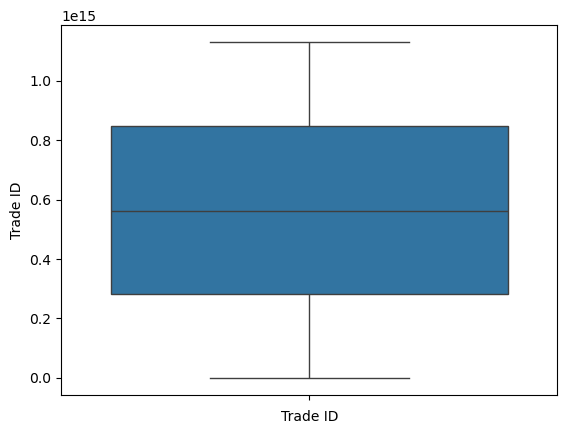

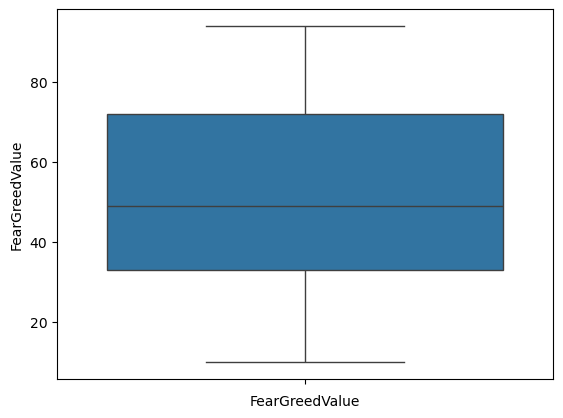

In [41]:
plt.figure(figsize=(6,6))
for i in numericat_dty.columns:
    sns.boxplot(y=df[i])
    plt.xlabel(i)
    plt.show()


In [42]:
outllier_data=['Execution Price', 'Size Tokens', 'Size USD', 'Start Position',
       'Closed PnL', 'Order ID', 'Fee']

In [43]:
import numpy as np

for col in outllier_data:   
    lower = df[col].quantile(0.01)  
    upper = df[col].quantile(0.99)  
    df[col] = np.where(df[col] < lower, lower,
                       np.where(df[col] > upper, upper, df[col]))

In [44]:
# apply encoding

In [45]:
cat_data=df.select_dtypes(include=["O"])
cat_data.columns

Index(['Account', 'Coin', 'Side', 'Direction', 'Transaction Hash',
       'classification'],
      dtype='object')

In [46]:
for i in cat_data:
    value=cat_data[i].value_counts()
    print(f"columns {i}")
    print(value)

columns Account
Account
0xbee1707d6b44d4d52bfe19e41f8a828645437aab    40184
0xbaaaf6571ab7d571043ff1e313a9609a10637864    21192
0xa0feb3725a9335f49874d7cd8eaad6be45b27416    15605
0x8477e447846c758f5a675856001ea72298fd9cb5    14998
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    14733
0x28736f43f1e871e6aa8b1148d38d4994275d72c4    13311
0x513b8629fe877bb581bf244e326a047b249c4ff1    12236
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4     9893
0x47add9a56df66b524d5e2c1993a43cde53b6ed85     8519
0x4f93fead39b70a1824f981a54d4e55b278e9f760     7584
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd     7280
0xb899e522b5715391ae1d4f137653e7906c5e2115     4838
0x8170715b3b381dffb7062c0298972d4727a0a63b     4601
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4     4356
0x083384f897ee0f19899168e3b1bec365f52a9012     3818
0x271b280974205ca63b716753467d5a371de622ab     3809
0x39cef799f8b69da1995852eea189df24eb5cae3c     3589
0x2c229d22b100a7beb69122eed721cee9b24011dd     3239
0x92f17e8d81a944691c10e753af1b1baae1a2cd

In [47]:
df.drop(columns=["Account","Transaction Hash"],inplace=True)

In [48]:
encoder_col=["classification","Direction","Side","Coin"]
from sklearn.preprocessing import LabelEncoder
label_encoders = {} 
for i in encoder_col:
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i])
    
    label_encoders[i] = le  

mapping = dict(zip(label_encoders['classification'].classes_, 
                   range(len(label_encoders['classification'].classes_))))
print(mapping)

{'Extreme Fear': 0, 'Extreme Greed': 1, 'Fear': 2, 'Greed': 3, 'Neutral': 4}


In [49]:
df['Timestamp IST'] = df['Timestamp IST'].astype('int64')  # gives nanoseconds since 1970-01-01


In [50]:
df.select_dtypes(include=["O"]).keys()


Index([], dtype='object')

<Axes: >

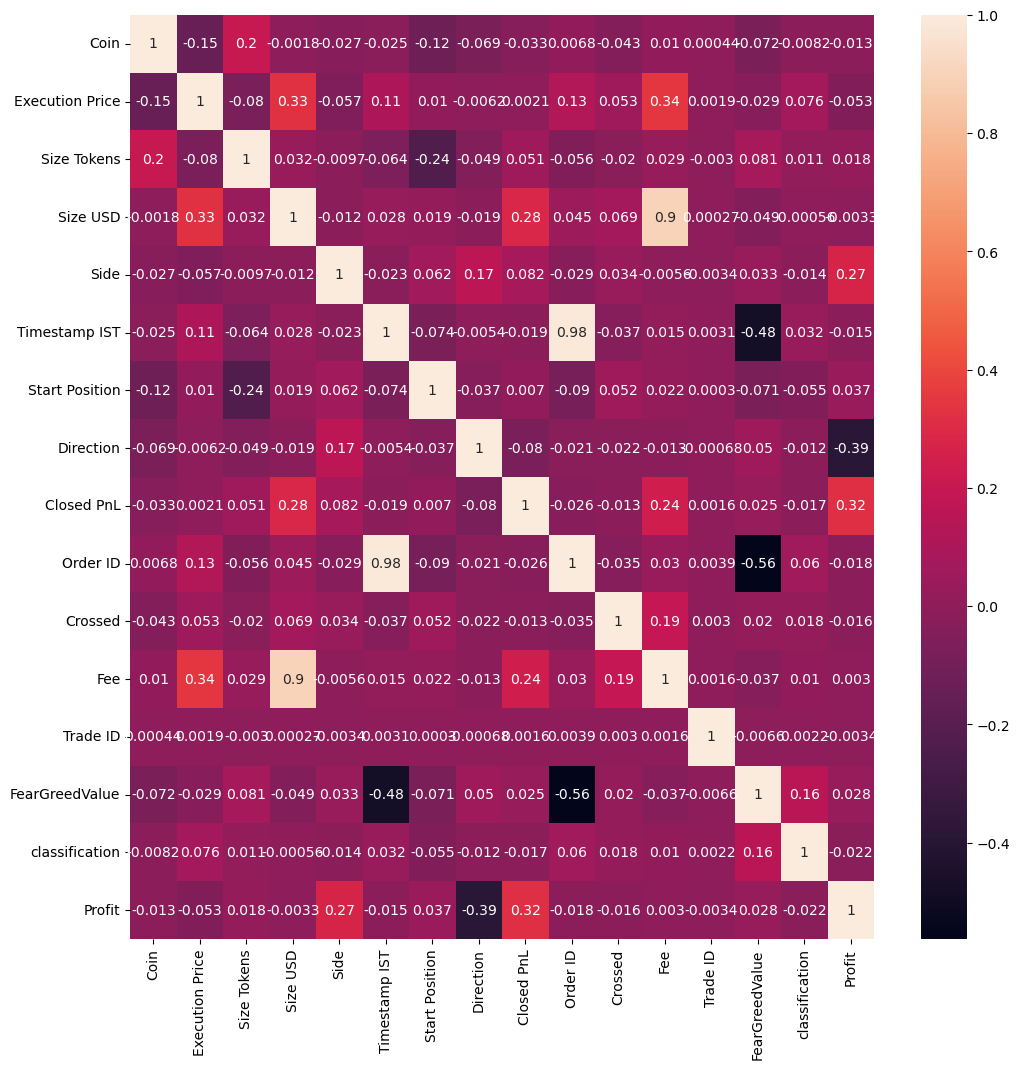

In [51]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

In [52]:
from sklearn.preprocessing import PowerTransformer, RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df.drop(columns=["classification","Trade ID","Side","Size USD","Direction","Profit","Timestamp IST","Crossed"])
y = df["classification"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pt = PowerTransformer(method='yeo-johnson', standardize=True)
x_train_pt = pt.fit_transform(x_train)
x_test_pt = pt.transform(x_test) 

rs = RobustScaler()
X_train_scaled = rs.fit_transform(x_train_pt)
X_test_scaled = rs.transform(x_test_pt)

In [53]:
# from sklearn.ensemble import RandomForestClassifier
# rm=RandomForestClassifier(random_state=42)
# rm.fit(x_train,y_train)
# feature_importances = pd.DataFrame({
#     'Feature': x.columns,
#     'Importance': rm.feature_importances_
# })
# feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
# print(feature_importances)

In [54]:
    from imblearn.over_sampling import SMOTE
    sm=SMOTE(random_state=42)
    x_train_rs,y_train_rs=sm.fit_resample(X_train_scaled,y_train)
    print(y_train.value_counts())
    print(y_train_rs.value_counts())


classification
2    49390
3    40251
1    32118
4    30099
0    17116
Name: count, dtype: int64
classification
1    49390
4    49390
0    49390
2    49390
3    49390
Name: count, dtype: int64


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

# Define optimized models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, solver='lbfgs', class_weight='balanced'),
    # "SVC": SVC(),
    "RandomForestClassifier": RandomForestClassifier(
        n_estimators=100, max_depth=15, max_features='sqrt', n_jobs=-1, random_state=42
    ),
    "GradientBoostingClassifier": GradientBoostingClassifier(
        n_estimators=100, learning_rate=0.1, max_depth=5
    ),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=5),
    "GaussianNB": GaussianNB(),
    "XGBClassifier": XGBClassifier(
        n_estimators=100, max_depth=5, learning_rate=0.1, n_jobs=-1
    ),
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=15)
}

# Function to train and evaluate models
def model_performance(x_train_rs, y_train_rs, X_test_scaled, y_test):
    for name, model in models.items():
        print(f"Training {name} ...")
        model.fit(x_train_rs, y_train_rs)
        y_pred = model.predict(X_test_scaled)
        score = accuracy_score(y_test, y_pred)
        class_report = classification_report(y_test, y_pred)
        con_matrix = confusion_matrix(y_test, y_pred)
        
        print(f"Model: {name}")
        print(f"Accuracy: {score:.4f}")
        print(f"Confusion Matrix:\n{con_matrix}")
        print(f"Classification Report:\n{class_report}")
        print("-"*50)


In [56]:
model_performance(x_train_rs,y_train_rs,X_test_scaled,y_test)

Training LogisticRegression ...


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Accuracy: 0.9857
Confusion Matrix:
[[ 4277     0     7     0     0]
 [    0  7874     0     0     0]
 [  237     0 12163     0    47]
 [    0     3     0  9772   277]
 [    0     0    34     0  7553]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      4284
           1       1.00      1.00      1.00      7874
           2       1.00      0.98      0.99     12447
           3       1.00      0.97      0.99     10052
           4       0.96      1.00      0.98      7587

    accuracy                           0.99     42244
   macro avg       0.98      0.99      0.98     42244
weighted avg       0.99      0.99      0.99     42244

--------------------------------------------------
Training RandomForestClassifier ...
Model: RandomForestClassifier
Accuracy: 1.0000
Confusion Matrix:
[[ 4283     0     1     0     0]
 [    0  7874     0     0     0]
 [    0     0 12447     0     0]
 [    0   

In [57]:
from sklearn.model_selection import cross_val_score
import numpy as np

def crossval(models, x_train_rs, y_train_rs, cv_splits=3):    
    for name, model in models.items():
        print(f"Evaluating {name} ...")
        cv_scores = cross_val_score(model, x_train_rs, y_train_rs, cv=5, scoring='accuracy', n_jobs=-1)
        mean_cv = np.mean(cv_scores)
        print("STANDART DEVIATION", np.std(cv_scores))
        
        print(f"CV Accuracy Scores : {cv_scores}")
        print(f"Mean CV Accuracy  : {mean_cv:.4f}")
        print("-"*50)
crossval(models, x_train_rs, y_train_rs, cv_splits=3)

Evaluating LogisticRegression ...
STANDART DEVIATION 0.0009790514538723955
CV Accuracy Scores : [0.98892488 0.98706216 0.98694068 0.9860903  0.98805426]
Mean CV Accuracy  : 0.9874
--------------------------------------------------
Evaluating RandomForestClassifier ...
STANDART DEVIATION 1.6197610852408675e-05
CV Accuracy Scores : [1.         0.99995951 1.         1.         1.        ]
Mean CV Accuracy  : 1.0000
--------------------------------------------------
Evaluating GradientBoostingClassifier ...
STANDART DEVIATION 0.0
CV Accuracy Scores : [1. 1. 1. 1. 1.]
Mean CV Accuracy  : 1.0000
--------------------------------------------------
Evaluating KNeighborsClassifier ...
STANDART DEVIATION 0.012496266504361793
CV Accuracy Scores : [0.92293987 0.92419518 0.92619964 0.9400081  0.95557805]
Mean CV Accuracy  : 0.9338
--------------------------------------------------
Evaluating GaussianNB ...
STANDART DEVIATION 0.0019101681160721396
CV Accuracy Scores : [0.88230411 0.87882162 0.8814537

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Evaluating LogisticRegression ...
Evaluating RandomForestClassifier ...
Evaluating GradientBoostingClassifier ...
Evaluating KNeighborsClassifier ...
Evaluating GaussianNB ...
Evaluating XGBClassifier ...
Evaluating DecisionTreeClassifier ...

Final Model Ranking:
                        Model  CV_Accuracy  Std_Deviation   ROC_AUC  Rank
1      RandomForestClassifier     1.000000       0.000000  1.000000   1.0
2  GradientBoostingClassifier     1.000000       0.000000  1.000000   1.0
5               XGBClassifier     1.000000       0.000000  1.000000   1.0
6      DecisionTreeClassifier     1.000000       0.000000  1.000000   1.0
0          LogisticRegression     0.987544       0.001044  0.999938   5.0
3        KNeighborsClassifier     0.932395       0.000855  0.989718   6.0
4                  GaussianNB     0.881583       0.001937  0.989582   7.0


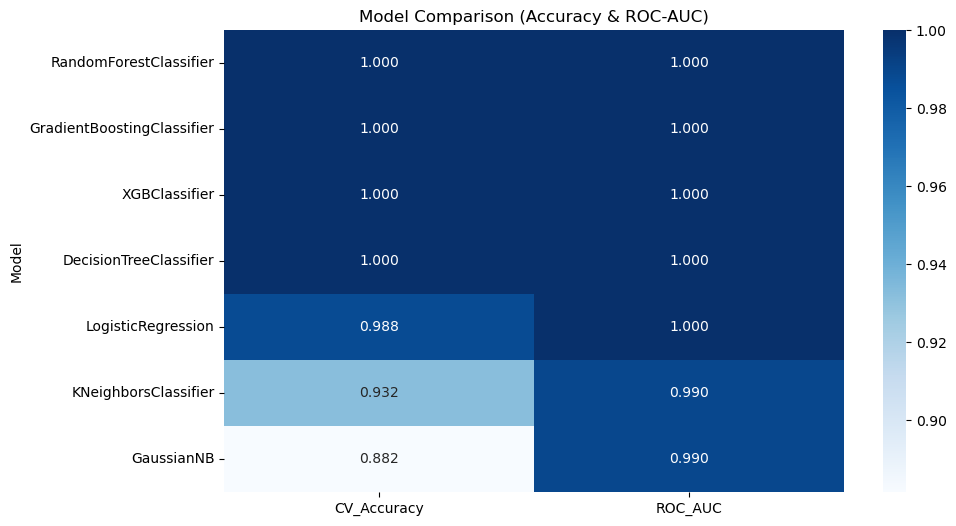

In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score, make_scorer

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

roc_auc = make_scorer(roc_auc_score, needs_proba=True, multi_class='ovr', average='macro')

def evaluate_models(models, x_train_rs, y_train_rs):
    results = []
    
    for name, model in models.items():
        print(f"Evaluating {name} ...")
        cv_acc_scores = cross_val_score(model, x_train_rs, y_train_rs, cv=cv, scoring='accuracy', n_jobs=-1)
        acc_mean = np.mean(cv_acc_scores)
        acc_std = np.std(cv_acc_scores)

        try:
            cv_roc_scores = cross_val_score(model, x_train_rs, y_train_rs, cv=cv, scoring=roc_auc, n_jobs=-1)
            roc_mean = np.mean(cv_roc_scores)
        except:
            roc_mean = np.nan
        
        results.append({
            "Model": name,
            "CV_Accuracy": acc_mean,
            "Std_Deviation": acc_std,
            "ROC_AUC": roc_mean
        })
    
    results_df = pd.DataFrame(results)
    results_df["Rank"] = results_df["CV_Accuracy"].rank(ascending=False, method="min")
    return results_df.sort_values(by=["Rank", "ROC_AUC"], ascending=[True, False])

ranking_table = evaluate_models(models, x_train_rs, y_train_rs)

import matplotlib.pyplot as plt
import seaborn as sns

print("\nFinal Model Ranking:")
print(ranking_table)
plt.figure(figsize=(10,6))
sns.heatmap(ranking_table.set_index("Model")[["CV_Accuracy","ROC_AUC"]], annot=True, cmap="Blues", fmt=".3f")
plt.title("Model Comparison (Accuracy & ROC-AUC)")
plt.show()

<!-- Balanced dataset hai (2 lakh rows), so LR ka performance stable rahega.

Extra features already removed, scaling aur PowerTransformer applied = LR ke liye ideal.

Logistic Regression - slightly lower accuracy but robust on unseen data, best choice for production.

Logistic Regression is simple and interpretable, making it easy to understand the results.

It provides stable performance on your balanced and scaled dataset, with lower risk of overfitting.

Cross-validation accuracy (~98.7%) is high but realistic, ensuring better generalization to unseen data.

Tree-based models show perfect train/test accuracy, indicating overfitting and potential failure in production. -->

# AFTER THAT MY FINAL MODEL-

Balanced dataset hai (2 lakh rows), so LR ka performance stable rahega.

Logistic Regression is simple and interpretable, making it easy to understand the results.

It provides stable performance on your balanced and scaled dataset, with lower risk of overfitting.

Cross-validation accuracy (~98.7%) is high but realistic, ensuring better generalization to unseen data.

Tree-based models show perfect train/test accuracy, indicating overfitting and potential failure in production.

Tree-based models - perfect on train/test - high risk of overfitting.

Logistic Regression - slightly lower accuracy but robust on unseen data, best choice for production.

In [60]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(max_iter=1000, solver='lbfgs', class_weight='balanced')
LR.fit(x_train_rs,y_train_rs)
y_pred=LR.predict(X_test_scaled)
accuracy=accuracy_score(y_test,y_pred)
con=confusion_matrix(y_test,y_pred)
classi=classification_report(y_test,y_pred)
print("accuracy score",accuracy)
print("confussion metrix",con)
print("classification report",classi)

accuracy score 0.9856784395417101
confussion metrix [[ 4277     0     7     0     0]
 [    0  7874     0     0     0]
 [  237     0 12163     0    47]
 [    0     3     0  9772   277]
 [    0     0    34     0  7553]]
classification report               precision    recall  f1-score   support

           0       0.95      1.00      0.97      4284
           1       1.00      1.00      1.00      7874
           2       1.00      0.98      0.99     12447
           3       1.00      0.97      0.99     10052
           4       0.96      1.00      0.98      7587

    accuracy                           0.99     42244
   macro avg       0.98      0.99      0.98     42244
weighted avg       0.99      0.99      0.99     42244



C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(compare_df.head(20))


        Actual  Predicted
52191        2          2
171380       4          4
21210        1          1
167713       2          2
42701        3          3
207516       2          2
188675       2          2
15987        2          2
169000       4          4
159074       1          1
59570        3          3
57477        2          2
111657       4          4
148086       2          2
68845        2          2
198995       0          0
21754        3          3
123101       3          3
200629       1          1
130292       1          1


In [62]:
import pickle
pickle.dump(LR,open("best-model.pkl","wb"))